### Charlie Buhanan
### Final Project: Part 4 - Data Analysis
### 4/302024
##### This program analysis the cleaned data to answer questions about the dataset.
##### The source of the dataset is https://www.kaggle.com/datasets/shadowtime2000/dungeons-dragons?select=spells.csv. (The spells.csv file.)

### Setup & Exploratory Analysis from Part 2
##### Used to reference when data cleaning.

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import time
import os
import csv

In [2]:
df = pd.read_csv('spells.csv')
print(df) 

     Unnamed: 0                       _id           index            name  \
0             0  5f2329b00b1bb138c594140a      acid-arrow      Acid Arrow   
1             1  5f2329b00b1bb138c5941409     acid-splash     Acid Splash   
2             2  5f2329b00b1bb138c594140c             aid             Aid   
3             3  5f2329b00b1bb138c594140b           alarm           Alarm   
4             4  5f2329b00b1bb138c594140d      alter-self      Alter Self   
..          ...                       ...             ...             ...   
314         314  5f2329b00b1bb138c5941543       wind-walk       Wind Walk   
315         315  5f2329b00b1bb138c5941544       wind-wall       Wind Wall   
316         316  5f2329b00b1bb138c5941546            wish            Wish   
317         317  5f2329b00b1bb138c5941545  word-of-recall  Word of Recall   
318         318  5f2329b00b1bb138c5941547   zone-of-truth   Zone of Truth   

                                                  desc  \
0    ['A shimmeri

In [3]:
df.columns # the unnamed_0 column is a number that lists spells in alphabetical order

Index(['Unnamed: 0', '_id', 'index', 'name', 'desc', 'higher_level', 'range',
       'components', 'material', 'ritual', 'duration', 'concentration',
       'casting_time', 'level', 'attack_type', 'damage', 'school', 'classes',
       'subclasses', 'url', 'dc', 'heal_at_slot_level', 'area_of_effect'],
      dtype='object')

In [4]:
print(df["level"].describe()) # average level is 3.7
df["range"].describe()

count    319.000000
mean       3.702194
std        2.524539
min        0.000000
25%        2.000000
50%        3.000000
75%        6.000000
max        9.000000
Name: level, dtype: float64


count       319
unique       17
top       Touch
freq         67
Name: range, dtype: object

In [5]:
df.shape

(319, 23)

In [6]:
df.dtypes

Unnamed: 0             int64
_id                   object
index                 object
name                  object
desc                  object
higher_level          object
range                 object
components            object
material              object
ritual                  bool
duration              object
concentration           bool
casting_time          object
level                  int64
attack_type           object
damage                object
school                object
classes               object
subclasses            object
url                   object
dc                    object
heal_at_slot_level    object
area_of_effect        object
dtype: object

In [7]:
df.head()

,Unnamed: 0,_id,index,name,desc,higher_level,range,components,material,ritual,...,level,attack_type,damage,school,classes,subclasses,url,dc,heal_at_slot_level,area_of_effect
0,0,5f2329b00b1bb138c594140a,acid-arrow,Acid Arrow,['A shimmering green arrow streaks toward a ta...,['When you cast this spell using a spell slot ...,90 feet,"['V', 'S', 'M']",Powdered rhubarb leaf and an adder's stomach.,False,...,2,ranged,"{'damage_type': {'name': 'Acid', 'url': '/api/...","{'name': 'Evocation', 'url': '/api/magic-schoo...","[{'name': 'Wizard', 'url': '/api/classes/wizar...","[{'name': 'Lore', 'url': '/api/subclasses/lore...",/api/spells/acid-arrow,NaN,NaN,NaN
1,1,5f2329b00b1bb138c5941409,acid-splash,Acid Splash,['You hurl a bubble of acid. Choose one creatu...,NaN,60 feet,"['V', 'S']",NaN,False,...,0,NaN,"{'damage_type': {'name': 'Acid', 'url': '/api/...","{'name': 'Conjuration', 'url': '/api/magic-sch...","[{'name': 'Sorcerer', 'url': '/api/classes/sor...","[{'name': 'Lore', 'url': '/api/subclasses/lore'}]",/api/spells/acid-splash,"{'dc_type': {'name': 'DEX', 'url': '/api/abili...",NaN,NaN
2,2,5f2329b00b1bb138c594140c,aid,Aid,"[""Your spell bolsters your allies with toughne...","[""When you cast this spell using a spell slot ...",30 feet,"['V', 'S', 'M']",A tiny strip of white cloth.,False,...,2,NaN,NaN,"{'name': 'Abjuration', 'url': '/api/magic-scho...","[{'name': 'Cleric', 'url': '/api/classes/cleri...","[{'name': 'Lore', 'url': '/api/subclasses/lore'}]",/api/spells/aid,NaN,"{'2': '5', '3': '10', '4': '15', '5': '20', '6...",NaN
3,3,5f2329b00b1bb138c594140b,alarm,Alarm,"[""You set an alarm against unwanted intrusion....",NaN,30 feet,"['V', 'S', 'M']",A tiny bell and a piece of fine silver wire.,True,...,1,NaN,NaN,"{'name': 'Abjuration', 'url': '/api/magic-scho...","[{'name': 'Ranger', 'url': '/api/classes/range...","[{'name': 'Lore', 'url': '/api/subclasses/lore'}]",/api/spells/alarm,NaN,NaN,"{'type': 'cube', 'size': 20}"
4,4,5f2329b00b1bb138c594140d,alter-self,Alter Self,['You assume a different form. When you cast t...,NaN,Self,"['V', 'S']",NaN,False,...,2,NaN,NaN,"{'name': 'Transmutation', 'url': '/api/magic-s...","[{'name': 'Sorcerer', 'url': '/api/classes/sor...","[{'name': 'Lore', 'url': '/api/subclasses/lore'}]",/api/spells/alter-self,NaN,NaN,NaN


In [8]:
df.tail()

,Unnamed: 0,_id,index,name,desc,higher_level,range,components,material,ritual,...,level,attack_type,damage,school,classes,subclasses,url,dc,heal_at_slot_level,area_of_effect
314,314,5f2329b00b1bb138c5941543,wind-walk,Wind Walk,"[""You and up to ten willing creatures you can ...",NaN,30 feet,"['V', 'S', 'M']",Fire and holy water.,False,...,6,NaN,NaN,"{'name': 'Transmutation', 'url': '/api/magic-s...","[{'name': 'Druid', 'url': '/api/classes/druid'}]",[],/api/spells/wind-walk,NaN,NaN,NaN
315,315,5f2329b00b1bb138c5941544,wind-wall,Wind Wall,['A wall of strong wind rises from the ground ...,NaN,120 feet,"['V', 'S', 'M']",A tiny fan and a feather of exotic origin.,False,...,3,NaN,"{'damage_type': {'name': 'Bludgeoning', 'url':...","{'name': 'Evocation', 'url': '/api/magic-schoo...","[{'name': 'Druid', 'url': '/api/classes/druid'...","[{'name': 'Lore', 'url': '/api/subclasses/lore'}]",/api/spells/wind-wall,"{'dc_type': {'name': 'STR', 'url': '/api/abili...",NaN,"{'type': 'line', 'size': 50}"
316,316,5f2329b00b1bb138c5941546,wish,Wish,['Wish is the mightiest spell a mortal creatur...,NaN,Self,['V'],NaN,False,...,9,NaN,NaN,"{'name': 'Conjuration', 'url': '/api/magic-sch...","[{'name': 'Sorcerer', 'url': '/api/classes/sor...",[],/api/spells/wish,NaN,NaN,NaN
317,317,5f2329b00b1bb138c5941545,word-of-recall,Word of Recall,['You and up to five willing creatures within ...,NaN,5 feet,['V'],NaN,False,...,6,NaN,NaN,"{'name': 'Conjuration', 'url': '/api/magic-sch...","[{'name': 'Cleric', 'url': '/api/classes/cleri...",[],/api/spells/word-of-recall,NaN,NaN,"{'type': 'sphere', 'size': 5}"
318,318,5f2329b00b1bb138c5941547,zone-of-truth,Zone of Truth,"[""You create a magical zone that guards agains...",NaN,60 feet,"['V', 'S']",NaN,False,...,2,NaN,NaN,"{'name': 'Enchantment', 'url': '/api/magic-sch...","[{'name': 'Bard', 'url': '/api/classes/bard'},...","[{'name': 'Lore', 'url': '/api/subclasses/lore...",/api/spells/zone-of-truth,NaN,NaN,"{'type': 'sphere', 'size': 15}"


In [9]:
df.sample()

,Unnamed: 0,_id,index,name,desc,higher_level,range,components,material,ritual,...,level,attack_type,damage,school,classes,subclasses,url,dc,heal_at_slot_level,area_of_effect
143,143,5f2329b00b1bb138c5941498,guardian-of-faith,Guardian of Faith,['A Large spectral guardian appears and hovers...,NaN,30 feet,['V'],NaN,False,...,4,NaN,"{'damage_type': {'name': 'Radiant', 'url': '/a...","{'name': 'Conjuration', 'url': '/api/magic-sch...","[{'name': 'Cleric', 'url': '/api/classes/cleri...",[],/api/spells/guardian-of-faith,"{'dc_type': {'name': 'DEX', 'url': '/api/abili...",NaN,"{'type': 'cylinder', 'size': 10}"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          319 non-null    int64 
 1   _id                 319 non-null    object
 2   index               319 non-null    object
 3   name                319 non-null    object
 4   desc                319 non-null    object
 5   higher_level        87 non-null     object
 6   range               319 non-null    object
 7   components          319 non-null    object
 8   material            184 non-null    object
 9   ritual              319 non-null    bool  
 10  duration            319 non-null    object
 11  concentration       319 non-null    bool  
 12  casting_time        319 non-null    object
 13  level               319 non-null    int64 
 14  attack_type         20 non-null     object
 15  damage              69 non-null     object
 16  school              319 no

### Data Cleaning from Part 3
#### Question 1: Did your exploratory analysis from last week highlight anything that needs to be cleaned?
#### Yes, the first column is unnamed. There are a lot of NaNs and there are brackets and parenthesis around some columns of data. 

In [11]:
# Renames the first column from Unnamed: 0 to alphabetical_num. Also renames desc to description.
df.columns = ['alphabetical_num', '_id', 'index', 'name', 'description', 'higher_level', 'range',
       'components', 'material', 'ritual', 'duration', 'concentration',
       'casting_time', 'level', 'attack_type', 'damage', 'school', 'classes',
       'subclasses', 'url', 'dc', 'heal_at_slot_level', 'area_of_effect']

df.columns

print(type(df["description"]))
print(type(df["school"]))
print(type(df["classes"]))
print(type(df["description"][0]))
print(type(df["school"][1]))
print(type(df["classes"][2])) #These datatypes have extra syntax but are usable as panda series objects.

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'str'>
<class 'str'>
<class 'str'>


#### Investigate any NaN's that you find. Should these be replaced with another value? If so, what would be the best value? Should that record be deleted instead?

In [12]:
for column in df:
    print(df[column].isnull(), end = "\n----------\n")
# The NaNs (looking at previous data exploration) also seem to be good because they just indicate a lack of an attribute. 
# For example, many spells have an NaN in the attack_type variable because they aren't attacks.
# Overall the NaNs are useful adn should be kept.

0      False
1      False
2      False
3      False
4      False
       ...  
314    False
315    False
316    False
317    False
318    False
Name: alphabetical_num, Length: 319, dtype: bool
----------
0      False
1      False
2      False
3      False
4      False
       ...  
314    False
315    False
316    False
317    False
318    False
Name: _id, Length: 319, dtype: bool
----------
0      False
1      False
2      False
3      False
4      False
       ...  
314    False
315    False
316    False
317    False
318    False
Name: index, Length: 319, dtype: bool
----------
0      False
1      False
2      False
3      False
4      False
       ...  
314    False
315    False
316    False
317    False
318    False
Name: name, Length: 319, dtype: bool
----------
0      False
1      False
2      False
3      False
4      False
       ...  
314    False
315    False
316    False
317    False
318    False
Name: description, Length: 319, dtype: bool
----------
0      False
1       True


#### Are there outliers to any of the data items? What could explain those outliers? Should those records be changed or deleted?
##### There are no outliers.
#### Are the column names not in a format that makes it easy to refer to?
##### The unnamed column was not easy to refer to but was already fixed.
#### Do you need to merge multiple datasets into one?
##### No, there is only 1 dataset.

#### Do you need to split up a column's data into multiple columns or simplify its values?
##### Yes, some columns could be split up. Most importantly the "components" and "school"| columns contain lists that could easily be broken up into unique columns.

In [13]:
print(df["components"], "\n\n")
print(df["school"], "\n\n")

0      ['V', 'S', 'M']
1           ['V', 'S']
2      ['V', 'S', 'M']
3      ['V', 'S', 'M']
4           ['V', 'S']
            ...       
314    ['V', 'S', 'M']
315    ['V', 'S', 'M']
316              ['V']
317              ['V']
318         ['V', 'S']
Name: components, Length: 319, dtype: object 


0      {'name': 'Evocation', 'url': '/api/magic-schoo...
1      {'name': 'Conjuration', 'url': '/api/magic-sch...
2      {'name': 'Abjuration', 'url': '/api/magic-scho...
3      {'name': 'Abjuration', 'url': '/api/magic-scho...
4      {'name': 'Transmutation', 'url': '/api/magic-s...
                             ...                        
314    {'name': 'Transmutation', 'url': '/api/magic-s...
315    {'name': 'Evocation', 'url': '/api/magic-schoo...
316    {'name': 'Conjuration', 'url': '/api/magic-sch...
317    {'name': 'Conjuration', 'url': '/api/magic-sch...
318    {'name': 'Enchantment', 'url': '/api/magic-sch...
Name: school, Length: 319, dtype: object 




In [14]:
components_subset = df[['components']]

#splits components into verbal, somatic, and material
for x, c in components_subset.iterrows(): #Credit to chatgpt for the interrows() and loc functions
    df.loc[x, 'verbal_component'] = 'V' in c['components']
    df.loc[x, 'somatic_component'] = 'S' in c['components']
    df.loc[x, 'material_component'] = 'M' in c['components']

df = df.drop('components', axis=1) #deletes old components column
print(df.columns)
print(df["verbal_component"])
print(df["somatic_component"])
print(df["material"])
df

Index(['alphabetical_num', '_id', 'index', 'name', 'description',
       'higher_level', 'range', 'material', 'ritual', 'duration',
       'concentration', 'casting_time', 'level', 'attack_type', 'damage',
       'school', 'classes', 'subclasses', 'url', 'dc', 'heal_at_slot_level',
       'area_of_effect', 'verbal_component', 'somatic_component',
       'material_component'],
      dtype='object')
0      True
1      True
2      True
3      True
4      True
       ... 
314    True
315    True
316    True
317    True
318    True
Name: verbal_component, Length: 319, dtype: object
0       True
1       True
2       True
3       True
4       True
       ...  
314     True
315     True
316    False
317    False
318     True
Name: somatic_component, Length: 319, dtype: object
0      Powdered rhubarb leaf and an adder's stomach.
1                                                NaN
2                       A tiny strip of white cloth.
3       A tiny bell and a piece of fine silver wire.
4        

,alphabetical_num,_id,index,name,description,higher_level,range,material,ritual,duration,...,school,classes,subclasses,url,dc,heal_at_slot_level,area_of_effect,verbal_component,somatic_component,material_component
0,0,5f2329b00b1bb138c594140a,acid-arrow,Acid Arrow,['A shimmering green arrow streaks toward a ta...,['When you cast this spell using a spell slot ...,90 feet,Powdered rhubarb leaf and an adder's stomach.,False,Instantaneous,...,"{'name': 'Evocation', 'url': '/api/magic-schoo...","[{'name': 'Wizard', 'url': '/api/classes/wizar...","[{'name': 'Lore', 'url': '/api/subclasses/lore...",/api/spells/acid-arrow,NaN,NaN,NaN,True,True,True
1,1,5f2329b00b1bb138c5941409,acid-splash,Acid Splash,['You hurl a bubble of acid. Choose one creatu...,NaN,60 feet,NaN,False,Instantaneous,...,"{'name': 'Conjuration', 'url': '/api/magic-sch...","[{'name': 'Sorcerer', 'url': '/api/classes/sor...","[{'name': 'Lore', 'url': '/api/subclasses/lore'}]",/api/spells/acid-splash,"{'dc_type': {'name': 'DEX', 'url': '/api/abili...",NaN,NaN,True,True,False
2,2,5f2329b00b1bb138c594140c,aid,Aid,"[""Your spell bolsters your allies with toughne...","[""When you cast this spell using a spell slot ...",30 feet,A tiny strip of white cloth.,False,8 hours,...,"{'name': 'Abjuration', 'url': '/api/magic-scho...","[{'name': 'Cleric', 'url': '/api/classes/cleri...","[{'name': 'Lore', 'url': '/api/subclasses/lore'}]",/api/spells/aid,NaN,"{'2': '5', '3': '10', '4': '15', '5': '20', '6...",NaN,True,True,True
3,3,5f2329b00b1bb138c594140b,alarm,Alarm,"[""You set an alarm against unwanted intrusion....",NaN,30 feet,A tiny bell and a piece of fine silver wire.,True,8 hours,...,"{'name': 'Abjuration', 'url': '/api/magic-scho...","[{'name': 'Ranger', 'url': '/api/classes/range...","[{'name': 'Lore', 'url': '/api/subclasses/lore'}]",/api/spells/alarm,NaN,NaN,"{'type': 'cube', 'size': 20}",True,True,True
4,4,5f2329b00b1bb138c594140d,alter-self,Alter Self,['You assume a different form. When you cast t...,NaN,Self,NaN,False,Up to 1 hour,...,"{'name': 'Transmutation', 'url': '/api/magic-s...","[{'name': 'Sorcerer', 'url': '/api/classes/sor...","[{'name': 'Lore', 'url': '/api/subclasses/lore'}]",/api/spells/alter-self,NaN,NaN,NaN,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,314,5f2329b00b1bb138c5941543,wind-walk,Wind Walk,"[""You and up to ten willing creatures you can ...",NaN,30 feet,Fire and holy water.,False,8 hours,...,"{'name': 'Transmutation', 'url': '/api/magic-s...","[{'name': 'Druid', 'url': '/api/classes/druid'}]",[],/api/spells/wind-walk,NaN,NaN,NaN,True,True,True
315,315,5f2329b00b1bb138c5941544,wind-wall,Wind Wall,['A wall of strong wind rises from the ground ...,NaN,120 feet,A tiny fan and a feather of exotic origin.,False,Up to 1 minute,...,"{'name': 'Evocation', 'url': '/api/magic-schoo...","[{'name': 'Druid', 'url': '/api/classes/druid'...","[{'name': 'Lore', 'url': '/api/subclasses/lore'}]",/api/spells/wind-wall,"{'dc_type': {'name': 'STR', 'url': '/api/abili...",NaN,"{'type': 'line', 'size': 50}",True,True,True
316,316,5f2329b00b1bb138c5941546,wish,Wish,['Wish is the mightiest spell a mortal creatur...,NaN,Self,NaN,False,Instantaneous,...,"{'name': 'Conjuration', 'url': '/api/magic-sch...","[{'name': 'Sorcerer', 'url': '/api/classes/sor...",[],/api/spells/wish,NaN,NaN,NaN,True,False,False
317,317,5f2329b00b1bb138c5941545,word-of-recall,Word of Recall,['You and up to five willing creatures within ...,NaN,5 feet,NaN,False,Instantaneous,...,"{'name': 'Conjuration', 'url': '/api/magic-sch...","[{'name': 'Cleric', 'url': '/api/classes/cleri...",[],/api/spells/word-of-recall,NaN,NaN,"{'type': 'sphere', 'size': 5}",True,False,False


In [15]:
df['school_type'] = ''
df['school_url'] = ''

#turns the school column into a dictionary (Credit: Chatgpt)
dict_subset = df[df['school'].apply(lambda x: isinstance(x, dict))] 

for index, row in df.iterrows(): #splits the school column into 2 columns: school type, and school url
    if isinstance(row['school'], dict):
        df.at[index, 'school_type'] = row['school'].get('name', '')
        df.at[index, 'school_url'] = row['school'].get('url', '')

df = df.drop('school', axis=1) #deletes old school column
print(df.columns)
print(df["school_type"])
print(df["school_url"])
df
#DATA CLEANING IS DONE!

Index(['alphabetical_num', '_id', 'index', 'name', 'description',
       'higher_level', 'range', 'material', 'ritual', 'duration',
       'concentration', 'casting_time', 'level', 'attack_type', 'damage',
       'classes', 'subclasses', 'url', 'dc', 'heal_at_slot_level',
       'area_of_effect', 'verbal_component', 'somatic_component',
       'material_component', 'school_type', 'school_url'],
      dtype='object')
0       
1       
2       
3       
4       
      ..
314     
315     
316     
317     
318     
Name: school_type, Length: 319, dtype: object
0       
1       
2       
3       
4       
      ..
314     
315     
316     
317     
318     
Name: school_url, Length: 319, dtype: object


,alphabetical_num,_id,index,name,description,higher_level,range,material,ritual,duration,...,subclasses,url,dc,heal_at_slot_level,area_of_effect,verbal_component,somatic_component,material_component,school_type,school_url
0,0,5f2329b00b1bb138c594140a,acid-arrow,Acid Arrow,['A shimmering green arrow streaks toward a ta...,['When you cast this spell using a spell slot ...,90 feet,Powdered rhubarb leaf and an adder's stomach.,False,Instantaneous,...,"[{'name': 'Lore', 'url': '/api/subclasses/lore...",/api/spells/acid-arrow,NaN,NaN,NaN,True,True,True,,
1,1,5f2329b00b1bb138c5941409,acid-splash,Acid Splash,['You hurl a bubble of acid. Choose one creatu...,NaN,60 feet,NaN,False,Instantaneous,...,"[{'name': 'Lore', 'url': '/api/subclasses/lore'}]",/api/spells/acid-splash,"{'dc_type': {'name': 'DEX', 'url': '/api/abili...",NaN,NaN,True,True,False,,
2,2,5f2329b00b1bb138c594140c,aid,Aid,"[""Your spell bolsters your allies with toughne...","[""When you cast this spell using a spell slot ...",30 feet,A tiny strip of white cloth.,False,8 hours,...,"[{'name': 'Lore', 'url': '/api/subclasses/lore'}]",/api/spells/aid,NaN,"{'2': '5', '3': '10', '4': '15', '5': '20', '6...",NaN,True,True,True,,
3,3,5f2329b00b1bb138c594140b,alarm,Alarm,"[""You set an alarm against unwanted intrusion....",NaN,30 feet,A tiny bell and a piece of fine silver wire.,True,8 hours,...,"[{'name': 'Lore', 'url': '/api/subclasses/lore'}]",/api/spells/alarm,NaN,NaN,"{'type': 'cube', 'size': 20}",True,True,True,,
4,4,5f2329b00b1bb138c594140d,alter-self,Alter Self,['You assume a different form. When you cast t...,NaN,Self,NaN,False,Up to 1 hour,...,"[{'name': 'Lore', 'url': '/api/subclasses/lore'}]",/api/spells/alter-self,NaN,NaN,NaN,True,True,False,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,314,5f2329b00b1bb138c5941543,wind-walk,Wind Walk,"[""You and up to ten willing creatures you can ...",NaN,30 feet,Fire and holy water.,False,8 hours,...,[],/api/spells/wind-walk,NaN,NaN,NaN,True,True,True,,
315,315,5f2329b00b1bb138c5941544,wind-wall,Wind Wall,['A wall of strong wind rises from the ground ...,NaN,120 feet,A tiny fan and a feather of exotic origin.,False,Up to 1 minute,...,"[{'name': 'Lore', 'url': '/api/subclasses/lore'}]",/api/spells/wind-wall,"{'dc_type': {'name': 'STR', 'url': '/api/abili...",NaN,"{'type': 'line', 'size': 50}",True,True,True,,
316,316,5f2329b00b1bb138c5941546,wish,Wish,['Wish is the mightiest spell a mortal creatur...,NaN,Self,NaN,False,Instantaneous,...,[],/api/spells/wish,NaN,NaN,NaN,True,False,False,,
317,317,5f2329b00b1bb138c5941545,word-of-recall,Word of Recall,['You and up to five willing creatures within ...,NaN,5 feet,NaN,False,Instantaneous,...,[],/api/spells/word-of-recall,NaN,NaN,"{'type': 'sphere', 'size': 5}",True,False,False,,


### Data Analysis
#### Question 1: What is the average spell level?

In [52]:
from matplotlib import pyplot as plt
import seaborn as sns

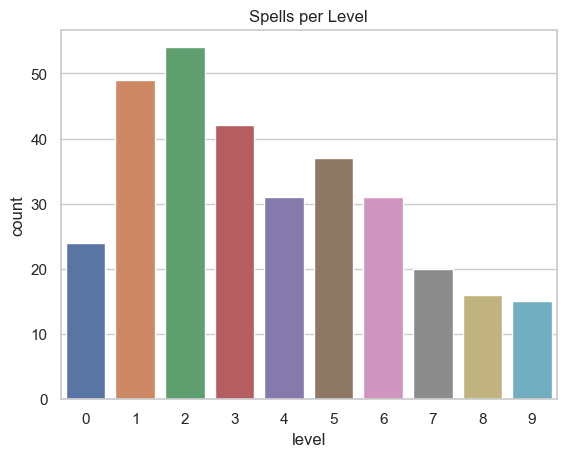

In [56]:
sns.set(style="whitegrid")
sns.countplot(x='level', data=df)
plt.title('Spells per Level')
plt.show()
# The level of spells is skewed towards the lower levels.

### The below graph shows the levels from greatest count (left) to least (right).

<Axes: xlabel='level', ylabel='count'>

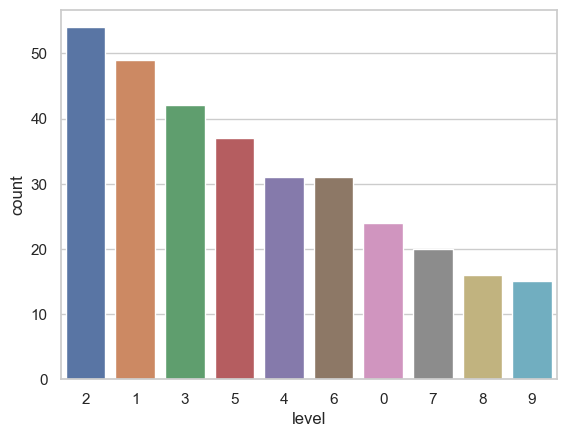

In [62]:
#pd.value_counts(df['level']).plot.bar() #Old code

# Revised
sns.countplot(x='level', data=df,order = df['level'].value_counts().index)
# 2 is the most common spell level, 9 is the least common. 0 level spells are surprisingly more rare then 6th level.

#### Average Challenge is around 3.7, it is on the lower side because spells range from level 0-9.

In [71]:
df['level'].mean()

3.7021943573667713

### Data Analysis
#### Question 2: What types of components are required to cast spells? What types are most common?

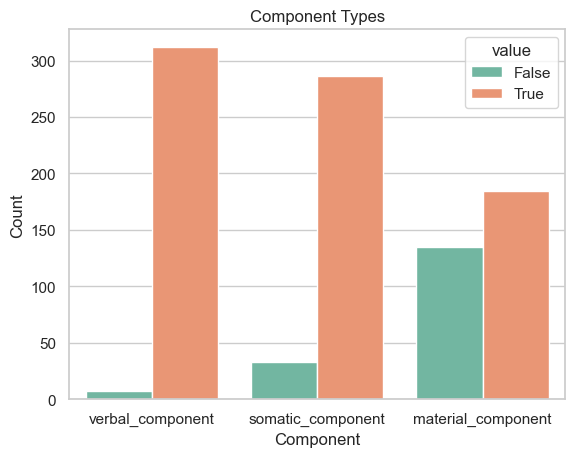

In [72]:
#credit for melt command: ChatGPT
df_melted = df[["verbal_component", "somatic_component", "material_component"]].melt(var_name='Components', value_name='value')

plt.title('Component Types')
sns.countplot(data=df_melted, x='Components', hue='value', palette='Set2')
plt.xlabel('Component')
plt.ylabel('Count')
plt.show()

In [70]:
verbal_true_count = (df["verbal_component"] == True).sum() # counts up exact totals for each spell component type
print("Verbal Exact Count (Verbal Component is True):", verbal_true_count)
somatic_true_count = (df["somatic_component"] == True).sum()
print("Somatic Exact Count (Verbal Component is True):", somatic_true_count)
material_true_count = (df["material_component"] == True).sum()
print("Material Exact Count (Verbal Component is True):", material_true_count)
print("Each is out of 319")

Verbal Exact Count (Verbal Component is True): 312
Somatic Exact Count (Verbal Component is True): 286
Material Exact Count (Verbal Component is True): 184
Each is out of 319


### Verbal spell components are the most common, followed by somatic (meaning hand waves/movement), and material.

### Data Analysis
#### Question 3: What percentage of spells are rituals?

In [21]:
df["ritual"]

0      False
1      False
2      False
3       True
4      False
       ...  
314    False
315    False
316    False
317    False
318    False
Name: ritual, Length: 319, dtype: bool

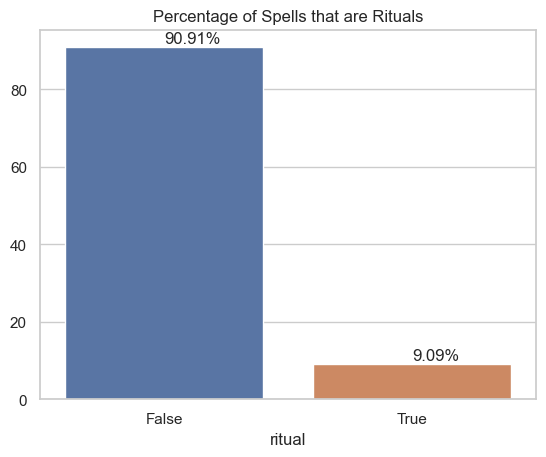

In [22]:
percentages = df['ritual'].value_counts(normalize=True) * 100

sns.barplot(x=percentages.index, y=percentages.values)
for i, v in enumerate(percentages.values):
    plt.text(i, v + 1, f"{v:.2f}%")
plt.title('Percentage of Spells that are Rituals')
plt.show()

### 9.09% of spells are rituals. Most spells cannot be casted as a ritual.

### Data Analysis
#### Question 4: What is the average casting time for a spell?

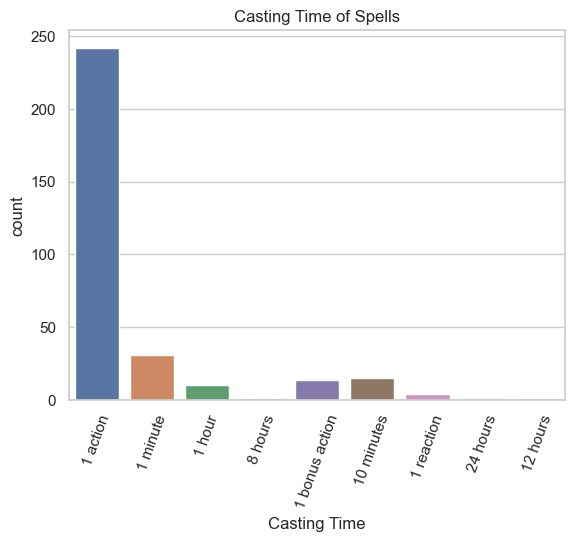

In [67]:
sns.set(style="whitegrid")
plt.title('Casting Time of Spells')
sns.countplot(x='casting_time', data=df)
plt.xlabel('Casting Time')
plt.xticks(rotation=70)
plt.show()
# The level of spells is skewed towards the lower levels.

#### The vast majority of spells have a casting time of 1 action (takes ~3-6 seconds). I can take this a step further though and covert each casting time into seconds to find the numerial average number of seconds it takes for a spell to be cast.

In [24]:
df["casting_time"]

0      1 action
1      1 action
2      1 action
3      1 minute
4      1 action
         ...   
314    1 minute
315    1 action
316    1 action
317    1 action
318    1 action
Name: casting_time, Length: 319, dtype: object

In [25]:
casting_times = df['casting_time'].tolist()
casting_times

['1 action',
 '1 action',
 '1 action',
 '1 minute',
 '1 action',
 '1 action',
 '1 action',
 '1 action',
 '1 minute',
 '1 action',
 '1 action',
 '1 action',
 '1 hour',
 '1 action',
 '1 action',
 '1 action',
 '1 action',
 '1 action',
 '1 hour',
 '1 minute',
 '8 hours',
 '1 action',
 '1 action',
 '1 action',
 '1 action',
 '1 action',
 '1 action',
 '1 action',
 '1 action',
 '1 action',
 '1 action',
 '1 action',
 '1 action',
 '1 bonus action',
 '1 action',
 '1 action',
 '1 action',
 '1 action',
 '1 action',
 '1 action',
 '1 action',
 '10 minutes',
 '1 hour',
 '1 action',
 '1 action',
 '1 action',
 '1 minute',
 '1 minute',
 '1 action',
 '1 action',
 '1 action',
 '1 action',
 '1 action',
 '1 minute',
 '1 minute',
 '1 minute',
 '1 minute',
 '1 action',
 '1 minute',
 '1 action',
 '10 minutes',
 '1 action',
 '1 action',
 '10 minutes',
 '1 reaction',
 '1 action',
 '1 action',
 '1 minute',
 '1 minute',
 '1 action',
 '1 action',
 '1 action',
 '1 action',
 '1 action',
 '1 action',
 '1 action',
 '1 a

#### The below code converts each abstract casting time (ex: 1 action, 1 reaction, etc.) into seconds and finds average spell casting time.

In [26]:
total = 0
for x in casting_times:
    if x == '1 action':
        total += 6
    elif x == '1 minute':
        total += 60
    elif x == '1 hour':
        total += 3600
    elif x == '8 hours':
        total += 28800
    elif x == '1 bonus action':
        total += 3
    elif x == '10 minutes':
        total += 600
    elif x == '1 reaction':
        total += 1
    elif x == '24 hours':
        total += 86400
    elif x == '12 hours':
        total += 43200
    else:
        print("Unknown time type.")
    
avg = total / len(casting_times)
print("Average Casting Time for a D&D Spell is: ", avg, " seconds.")

Average Casting Time for a D&D Spell is:  648.1442006269592  seconds.


### The average D&D Spell casting time is 648 seconds, or 10.8 minutes. 